In [18]:
"""
From chapter 6 in 'Apprentissage prodond avec python' from François CHOLLET
"""

"\nFrom chapter 6 in 'Apprentissage prodond avec python' from François CHOLLET\n"

In [19]:
import keras
from keras import layers
from keras.models import Sequential
from keras.datasets import imdb
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [20]:
physical_devices = tf.config.list_physical_devices('GPU')
gpu = physical_devices[0]
gpu

PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')

# Data processing

In [21]:
max_feature = 10_000
maxlen = 500
batch_size = 32

In [22]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_feature)
x_train.shape, x_test.shape, np.unique(y_train)

((25000,), (25000,), array([0, 1], dtype=int64))

In [23]:
x_train = tf.keras.utils.pad_sequences(x_train, maxlen=maxlen)
x_test = tf.keras.utils.pad_sequences(x_test, maxlen=maxlen)
x_train.shape, x_test.shape

((25000, 500), (25000, 500))

# Model

In [31]:
model = Sequential()
model.add(layers.Dense(32, activation='sigmoid', input_shape=(x_train.shape[1], )))
# model.add(layers.Embedding(max_feature, 32))
# model.add(layers.SimpleRNN(32))
model.add(layers.Dense(1, activation='sigmoid'))

In [32]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 32)                16032     
                                                                 
 dense_10 (Dense)            (None, 1)                 33        
                                                                 
Total params: 16,065
Trainable params: 16,065
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(
    loss='binary_crossentropy',
    optimizer='rmsprop',
    metrics=['acc']
)

In [34]:
history = model.fit(
    x_train, 
    y_train,
    epochs=10,
    batch_size=10,
    validation_split=0.2
)

Epoch 1/10
2000/2000 [==============================] - 16s 8ms/step - loss: 0.7232 - acc: 0.5018 - val_loss: 0.6990 - val_acc: 0.5056
Epoch 2/10
2000/2000 [==============================] - 13s 6ms/step - loss: 0.6959 - acc: 0.5108 - val_loss: 0.6956 - val_acc: 0.5076
Epoch 3/10
2000/2000 [==============================] - 13s 6ms/step - loss: 0.6940 - acc: 0.5092 - val_loss: 0.6971 - val_acc: 0.4936
Epoch 4/10
2000/2000 [==============================] - 12s 6ms/step - loss: 0.6928 - acc: 0.5156 - val_loss: 0.6943 - val_acc: 0.5056
Epoch 5/10
2000/2000 [==============================] - 12s 6ms/step - loss: 0.6926 - acc: 0.5164 - val_loss: 0.6936 - val_acc: 0.5062
Epoch 6/10
2000/2000 [==============================] - 13s 6ms/step - loss: 0.6924 - acc: 0.5138 - val_loss: 0.6939 - val_acc: 0.5094
Epoch 7/10
2000/2000 [==============================] - 13s 6ms/step - loss: 0.6920 - acc: 0.5218 - val_loss: 0.6948 - val_acc: 0.4980
Epoch 8/10
2000/2000 [==============================] -

 # Display performances curves

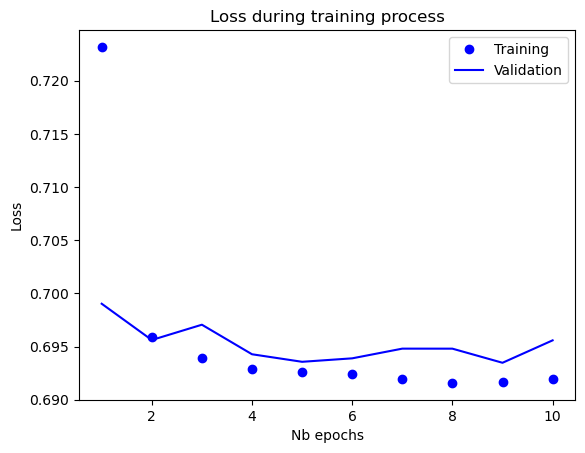

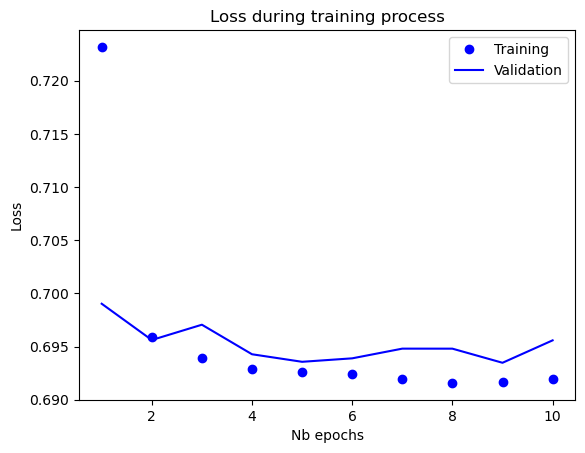

In [39]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, 11)

plt.plot(epochs, loss_values, 'bo', label="Training")
plt.plot(epochs, val_loss_values, 'b', label="Validation")

plt.title("Loss during training process")
plt.xlabel("Nb epochs")
plt.ylabel("Loss")
plt.legend()

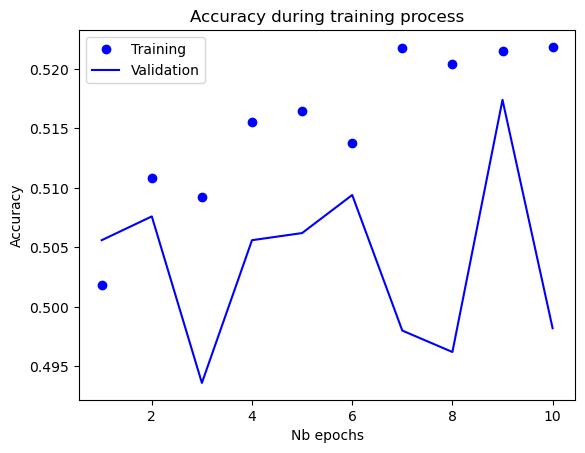

In [40]:
history_dict = history.history
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

epochs = range(1, 11)

plt.plot(epochs, acc_values, 'bo', label="Training")
plt.plot(epochs, val_acc_values, 'b', label="Validation")

plt.title("Accuracy during training process")
plt.xlabel("Nb epochs")
plt.ylabel("Accuracy")
plt.legend()